In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#chargement des donnees
df_sols = pd.read_csv('C:/Users/Zeen/projet_agricole/data/sols.csv')
df_meteo = pd.read_csv('C:/Users/Zeen/projet_agricole/data/meteo_detaillee.csv')
df_historique = pd.read_csv('C:/Users/Zeen/projet_agricole/data/historique_rendements.csv')
df_monitoring = pd.read_csv('C:/Users/Zeen/projet_agricole/data/monitoring_cultures.csv')

#### Analyse des donnees monitoring et historique des rendements 

In [4]:
df_monitoring.shape

(91350, 9)

In [5]:
df_historique.shape

(3000, 6)

In [6]:
df_monitoring['date'] = pd.to_datetime(df_monitoring['date'], errors='coerce')
df_historique['date'] = pd.to_datetime(df_historique['date'], errors='coerce')


In [7]:
df_monitoring.dtypes

date                datetime64[ns]
parcelle_id                 object
latitude                   float64
longitude                  float64
culture                     object
ndvi                       float64
lai                        float64
stress_hydrique            float64
biomasse_estimee           float64
dtype: object

In [8]:
df_historique.dtypes

parcelle_id                 object
date                datetime64[ns]
culture                     object
rendement_estime           float64
rendement_final            float64
progression                float64
dtype: object

In [9]:
df_monitoring.head()

,date,parcelle_id,latitude,longitude,culture,ndvi,lai,stress_hydrique,biomasse_estimee
0,2020-01-01,P001,33.85339,-5.515999,sol_nu,0.181,0.15,0.0,0.0
1,2020-01-02,P001,33.85339,-5.515999,sol_nu,0.190,0.26,0.0,0.0
2,2020-01-03,P001,33.85339,-5.515999,sol_nu,0.164,0.21,0.0,0.0
3,2020-01-04,P001,33.85339,-5.515999,sol_nu,0.178,0.20,0.0,0.0
4,2020-01-05,P001,33.85339,-5.515999,sol_nu,0.140,0.18,0.0,0.0


In [10]:
df_monitoring.isnull().sum()

date                0
parcelle_id         0
latitude            0
longitude           0
culture             0
ndvi                0
lai                 0
stress_hydrique     0
biomasse_estimee    0
dtype: int64

In [11]:
df_monitoring.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
91345    False
91346    False
91347    False
91348    False
91349    False
Length: 91350, dtype: bool

In [12]:
df_historique.isnull().sum()

parcelle_id            0
date                   0
culture                0
rendement_estime       0
rendement_final     2494
progression            0
dtype: int64

In [13]:
df_historique = df_historique.fillna(0)

In [15]:
df_historique['date'] = pd.to_datetime(df_historique['date'], errors='coerce')
df_historique['year'] = df_historique['date'].dt.to_period('Y').astype(str)

C:\Users\Zeen\AppData\Local\Temp\ipykernel_14076\2260170927.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


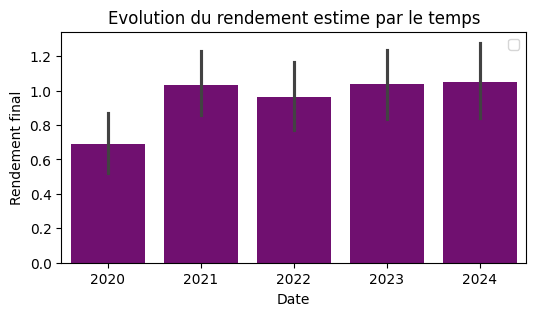

In [16]:
plt.figure(figsize=(6,3))
sns.barplot(data =df_historique, x='year', y= 'rendement_final', color = 'purple')
plt.title('Evolution du rendement estime par le temps')
plt.xlabel('Date')
plt.ylabel('Rendement final')
plt.legend()
plt.show()

C:\Users\Zeen\AppData\Local\Temp\ipykernel_14076\1942381689.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


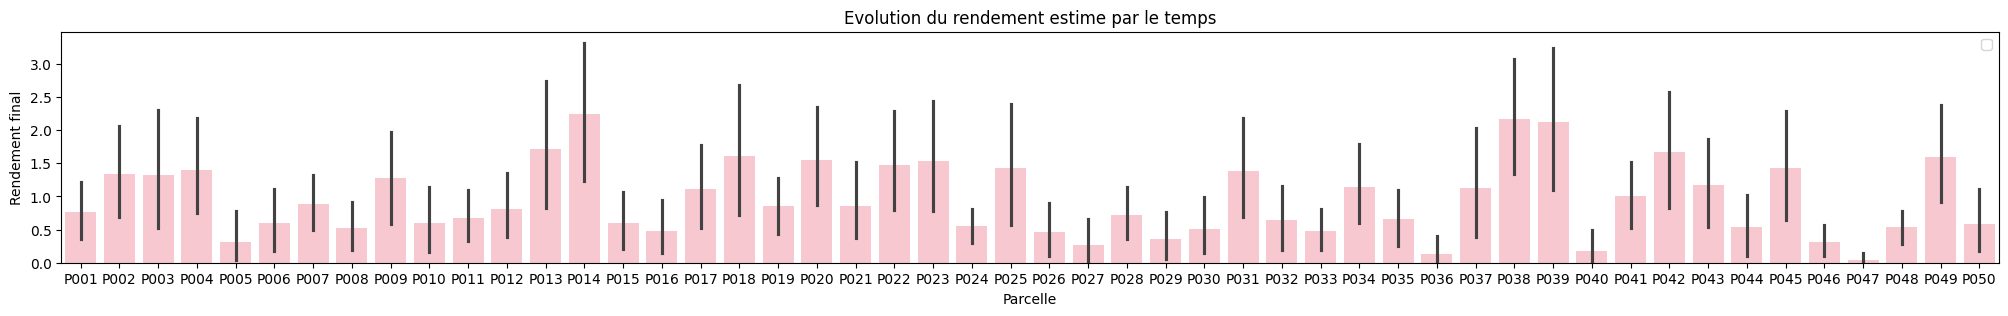

In [17]:
plt.figure(figsize=(25,3))
sns.barplot(data =df_historique, x='parcelle_id', y= 'rendement_final', color = 'pink')
plt.title('Evolution du rendement estime par le temps')
plt.xlabel('Parcelle')
plt.ylabel('Rendement final')
plt.legend()
plt.show()

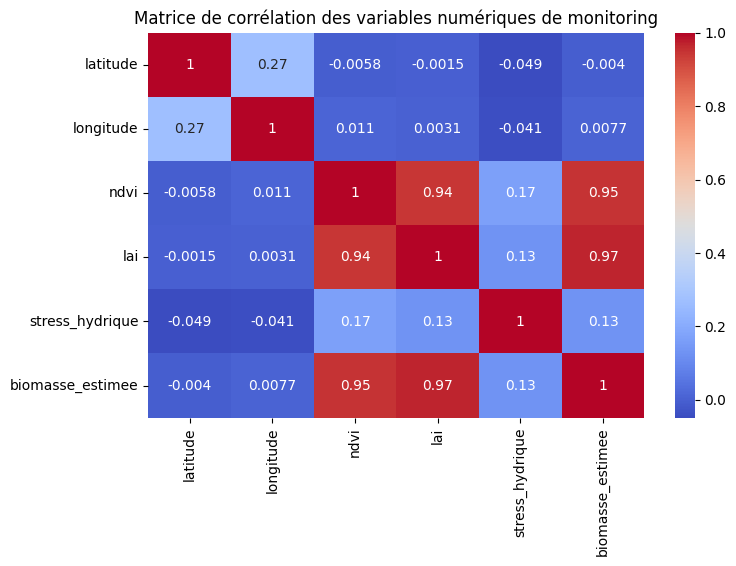

In [18]:
# Corrélations dans les données de monitoring
numeric_columns = df_monitoring.select_dtypes(include=['number'])
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables numériques de monitoring")
plt.show()


In [20]:
df_meteo.shape

(43848, 7)

In [21]:
df_meteo.isnull().sum()

date                   0
temperature            0
humidite               0
precipitation          0
rayonnement_solaire    0
vitesse_vent           0
direction_vent         0
dtype: int64

In [22]:
df_meteo.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43843    False
43844    False
43845    False
43846    False
43847    False
Length: 43848, dtype: bool

In [23]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])

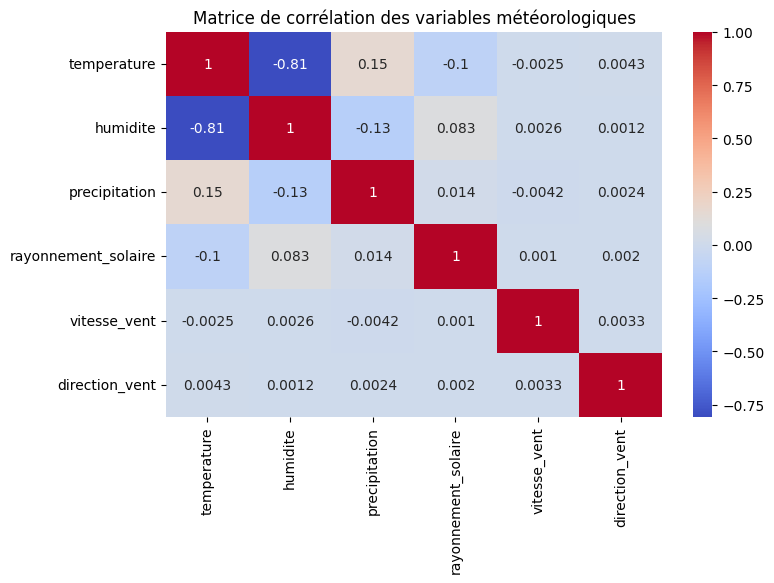

In [24]:
# Corrélation entre variables météo
numeric_columns = df_meteo.select_dtypes(include=['number'])
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables météorologiques")
plt.show()

In [25]:
df_meteo.describe()

,date,temperature,humidite,precipitation,rayonnement_solaire,vitesse_vent,direction_vent
count,43848,43848.000000,43848.000000,43848.000000,43848.000000,43848.000000,43848.000000
mean,2022-07-02 11:30:00,14.986754,88.191666,0.201446,189.355970,5.017230,180.251311
min,2020-01-01 00:00:00,-2.330000,59.800000,0.000000,0.000000,0.000000,0.000000
25%,2021-04-01 17:45:00,8.700000,83.150000,0.000000,0.000000,3.700000,89.500000
50%,2022-07-02 11:30:00,14.970000,90.050000,0.000000,0.000000,5.000000,180.200000
75%,2023-10-02 05:15:00,21.250000,95.000000,0.000000,353.540000,6.300000,270.200000
max,2024-12-31 23:00:00,33.250000,95.000000,15.310000,1041.010000,12.500000,360.000000
std,NaN,7.972472,7.090408,0.871931,249.322674,1.978351,104.047102


#### Analyse des donnees sols.csv

In [26]:
df_sols.columns

Index(['parcelle_id', 'latitude', 'longitude', 'type_sol', 'surface_ha',
       'capacite_retention_eau', 'ph', 'matiere_organique', 'azote',
       'phosphore', 'potassium'],
      dtype='object')

In [27]:
df_sols.isnull().sum()

parcelle_id               0
latitude                  0
longitude                 0
type_sol                  0
surface_ha                0
capacite_retention_eau    0
ph                        0
matiere_organique         0
azote                     0
phosphore                 0
potassium                 0
dtype: int64

In [28]:
df_sols.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [29]:
df_sols.describe()

,latitude,longitude,surface_ha,capacite_retention_eau,ph,matiere_organique,azote,phosphore,potassium
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,33.871293,-5.543901,12.800600,0.716400,7.100000,3.204200,0.204120,40.030000,251.808000
std,0.034563,0.027731,4.292493,0.148155,0.543233,0.669036,0.041551,10.690588,51.280604
min,33.842650,-5.593781,5.070000,0.410000,6.000000,1.540000,0.103000,21.200000,155.400000
25%,33.850452,-5.551373,9.045000,0.560000,6.700000,2.597500,0.175250,32.075000,213.100000
50%,33.854988,-5.539713,13.705000,0.765000,7.150000,3.340000,0.204500,39.400000,252.300000
75%,33.858922,-5.519616,16.090000,0.830000,7.500000,3.750000,0.225750,49.300000,293.750000
max,33.937407,-5.508548,19.720000,0.890000,8.000000,4.340000,0.300000,59.600000,345.600000


In [30]:
df_sols.value_counts(subset='type_sol')

type_sol
argileux           19
argilo-limoneux    17
sablo-limoneux     14
Name: count, dtype: int64

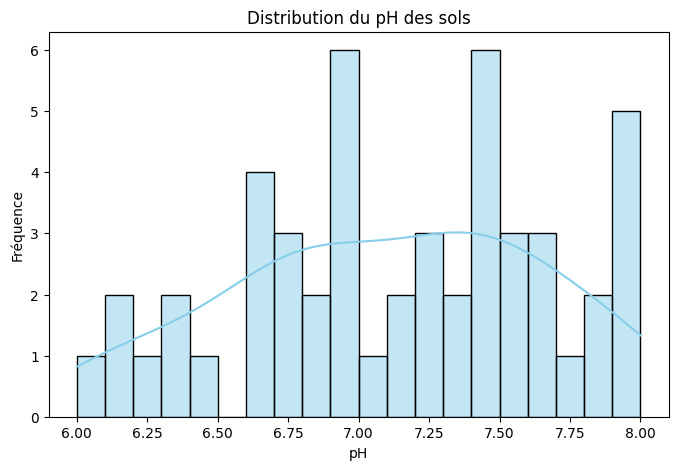

In [31]:
# Distribution des valeurs de pH
plt.figure(figsize=(8, 5))
sns.histplot(df_sols['ph'], kde=True, bins=20, color='skyblue')
plt.title("Distribution du pH des sols")
plt.xlabel("pH")
plt.ylabel("Fréquence")
plt.show()